This file attempts to use a circle mask to evaluate infill.

The following section initializes the following libraries:
- NumPy
    Array support and optimized math
- OpenCV
    Circle drawing and general image processing
- Matplotlib
    Figures and visualization

The image is loaded with `np.load`. This file uses the raw data, not the normalized data. You can modify it however you'd like, or you can download the full data.

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Only loads in first isolated material.
img = np.load("../matrices/isolated-materials/float32/Material1.npy")

# Load in pre-calculated data from dimensioning scripts.
radii = np.load("../dimensioning/radii.npy")
xs = np.load("../dimensioning/xs.npy")
ys = np.load("../dimensioning/ys.npy")

In [11]:
# Define ideal area vs observed area sum counters
areas = 0
real_areas = 0

# Iterate through every layer
for l in range(img.shape[2]):
    test_img = img[:,:,l]  # Take single slice
    test_img = (test_img>10900) * test_img  # Filter it and remove any values beneath 10900.
    #  ( 10900 is an arbitrary value that I deemed to adequately separate background from edges/material.)

    # Create the mask used to compare areas.
    mask_img = np.zeros(test_img.shape, dtype=np.uint8)  # Create blank mask image.

    # Draws the circle on the mask that best fits, based on the dimensioning code.
    # radii, xs, ys, all define circle location and size.
    # [1,0,0] defines color, -1 makes the circle filled in.
    # The "+41" is due to the isolated sections place within the entire original 3d image.
    mask_img = cv.circle(mask_img, [xs[l+41], ys[l+41]], radii[l+41], [1,0,0], -1) 

    # Add the mask area to the total area (multiply it by the Material 1 density first.)
    # This density was measured in the histograms.py file. Each material has its own.
    areas += np.sum(mask_img) * 11705
    real_areas += np.sum(test_img*mask_img)


print(real_areas/areas)  # Divide observed by ideal to find the infill density.

0.9310099623332889


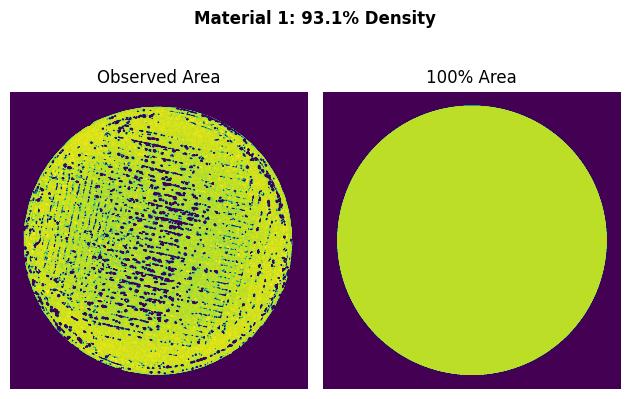

In [12]:
# This is just for displaying the figure.
test_img = img[:,:,100]  # Take a slice
test_img = (test_img>10900) * test_img  # Remove background
mask_img = np.zeros(test_img.shape, dtype=np.uint8)  # Create Mask
mask_img = cv.circle(mask_img, [xs[100+41], ys[100+41]], radii[100+41], [1,0,0], -1)  # Draw Mask

# Display Observed Area vs Mask next to each other.
fig, axs = plt.subplots(1,2)
axs[0].imshow(test_img, vmin=9000, vmax=12000)
axs[1].imshow(mask_img*11705, vmin=9000, vmax=12000)
axs[0].axis(False)
axs[1].axis(False)
axs[0].set_title("Observed Area")
axs[1].set_title("100% Area")
fig.tight_layout()
fig.suptitle("Material 1: 93.1% Density", fontweight='bold')
plt.show()

In [13]:
m1_ob = test_img
m1_me = mask_img*11705

In [14]:
# If the previous material is present, delete it to save ram and make room for new section.
try:
    del img
except:
    pass

# Load in isolated material 2.
img = np.load("../matrices/isolated-materials/float32/Material2.npy")

In [15]:
areas = 0
real_areas = 0
for l in range(img.shape[2]):
    test_img = img[:,:,l]
    test_img = (test_img>10900) * test_img
    mask_img = np.zeros(test_img.shape, dtype=np.uint8)
    mask_img = cv.circle(mask_img, [xs[l+770], ys[l+770]], radii[l+770], [1,0,0], -1)

    areas += np.sum(mask_img) * 11865
    real_areas += np.sum(test_img*mask_img)

print(real_areas/areas)

0.9180979249457607


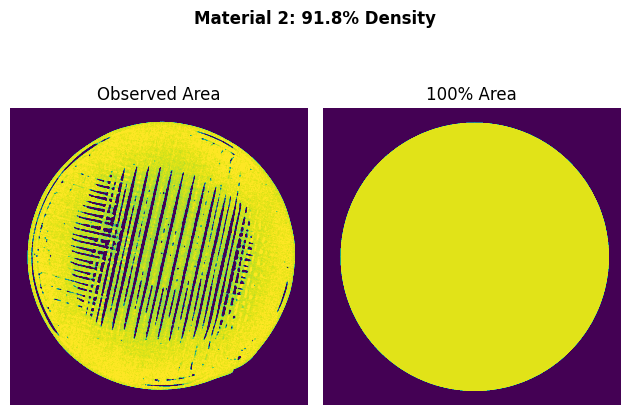

In [16]:
test_img = img[:,:,100]
test_img = (test_img>10900) * test_img
mask_img = np.zeros(test_img.shape, dtype=np.uint8)
mask_img = cv.circle(mask_img, [xs[100+770], ys[100+770]], radii[100+770], [1,0,0], -1)

fig, axs = plt.subplots(1,2)
axs[0].imshow(test_img, vmin=9000, vmax=12000)
axs[1].imshow(mask_img*11865, vmin=9000, vmax=12000)
axs[0].axis(False)
axs[1].axis(False)
axs[0].set_title("Observed Area")
axs[1].set_title("100% Area")
fig.suptitle("Material 2: 91.8% Density", fontweight='bold')
fig.tight_layout()
plt.show()

In [17]:
m2_ob = test_img
m2_me = mask_img*11865

In [18]:
try:
    del img
except:
    pass

img = np.load("../matrices/isolated-materials/float32/Material3.npy")

In [19]:
areas = 0
real_areas = 0
for l in range(img.shape[2]):
    test_img = img[:,:,l]
    test_img = (test_img>10900) * test_img
    mask_img = np.zeros(test_img.shape, dtype=np.uint8)
    mask_img = cv.circle(mask_img, [xs[l+1520], ys[l+1520]], radii[l+1520], [1,0,0], -1)

    areas += np.sum(mask_img) * 12305
    real_areas += np.sum(test_img*mask_img)

print(real_areas/areas)

0.9718125090212429


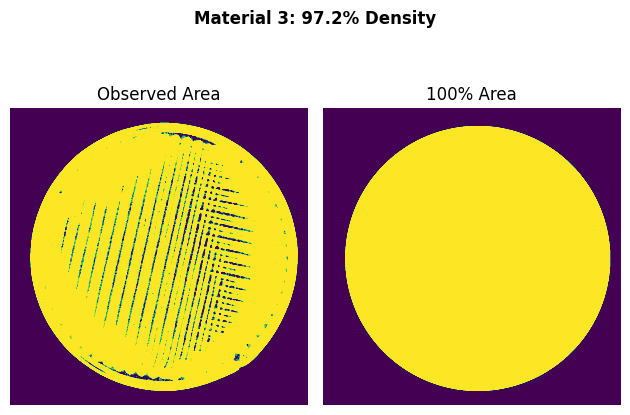

In [20]:
test_img = img[:,:,100]
test_img = (test_img>10900) * test_img
mask_img = np.zeros(test_img.shape, dtype=np.uint8)
mask_img = cv.circle(mask_img, [xs[100+1520], ys[100+1520]], radii[100+1520], [1,0,0], -1)

fig, axs = plt.subplots(1,2)
axs[0].imshow(test_img, vmin=9000, vmax=12000)
axs[1].imshow(mask_img*12305, vmin=9000, vmax=12000)
axs[0].axis(False)
axs[1].axis(False)
axs[0].set_title("Observed Area")
axs[1].set_title("100% Area")
fig.suptitle("Material 3: 97.2% Density", fontweight='bold')
fig.tight_layout()
plt.show()

In [21]:
m3_ob = test_img
m3_me = mask_img*12305

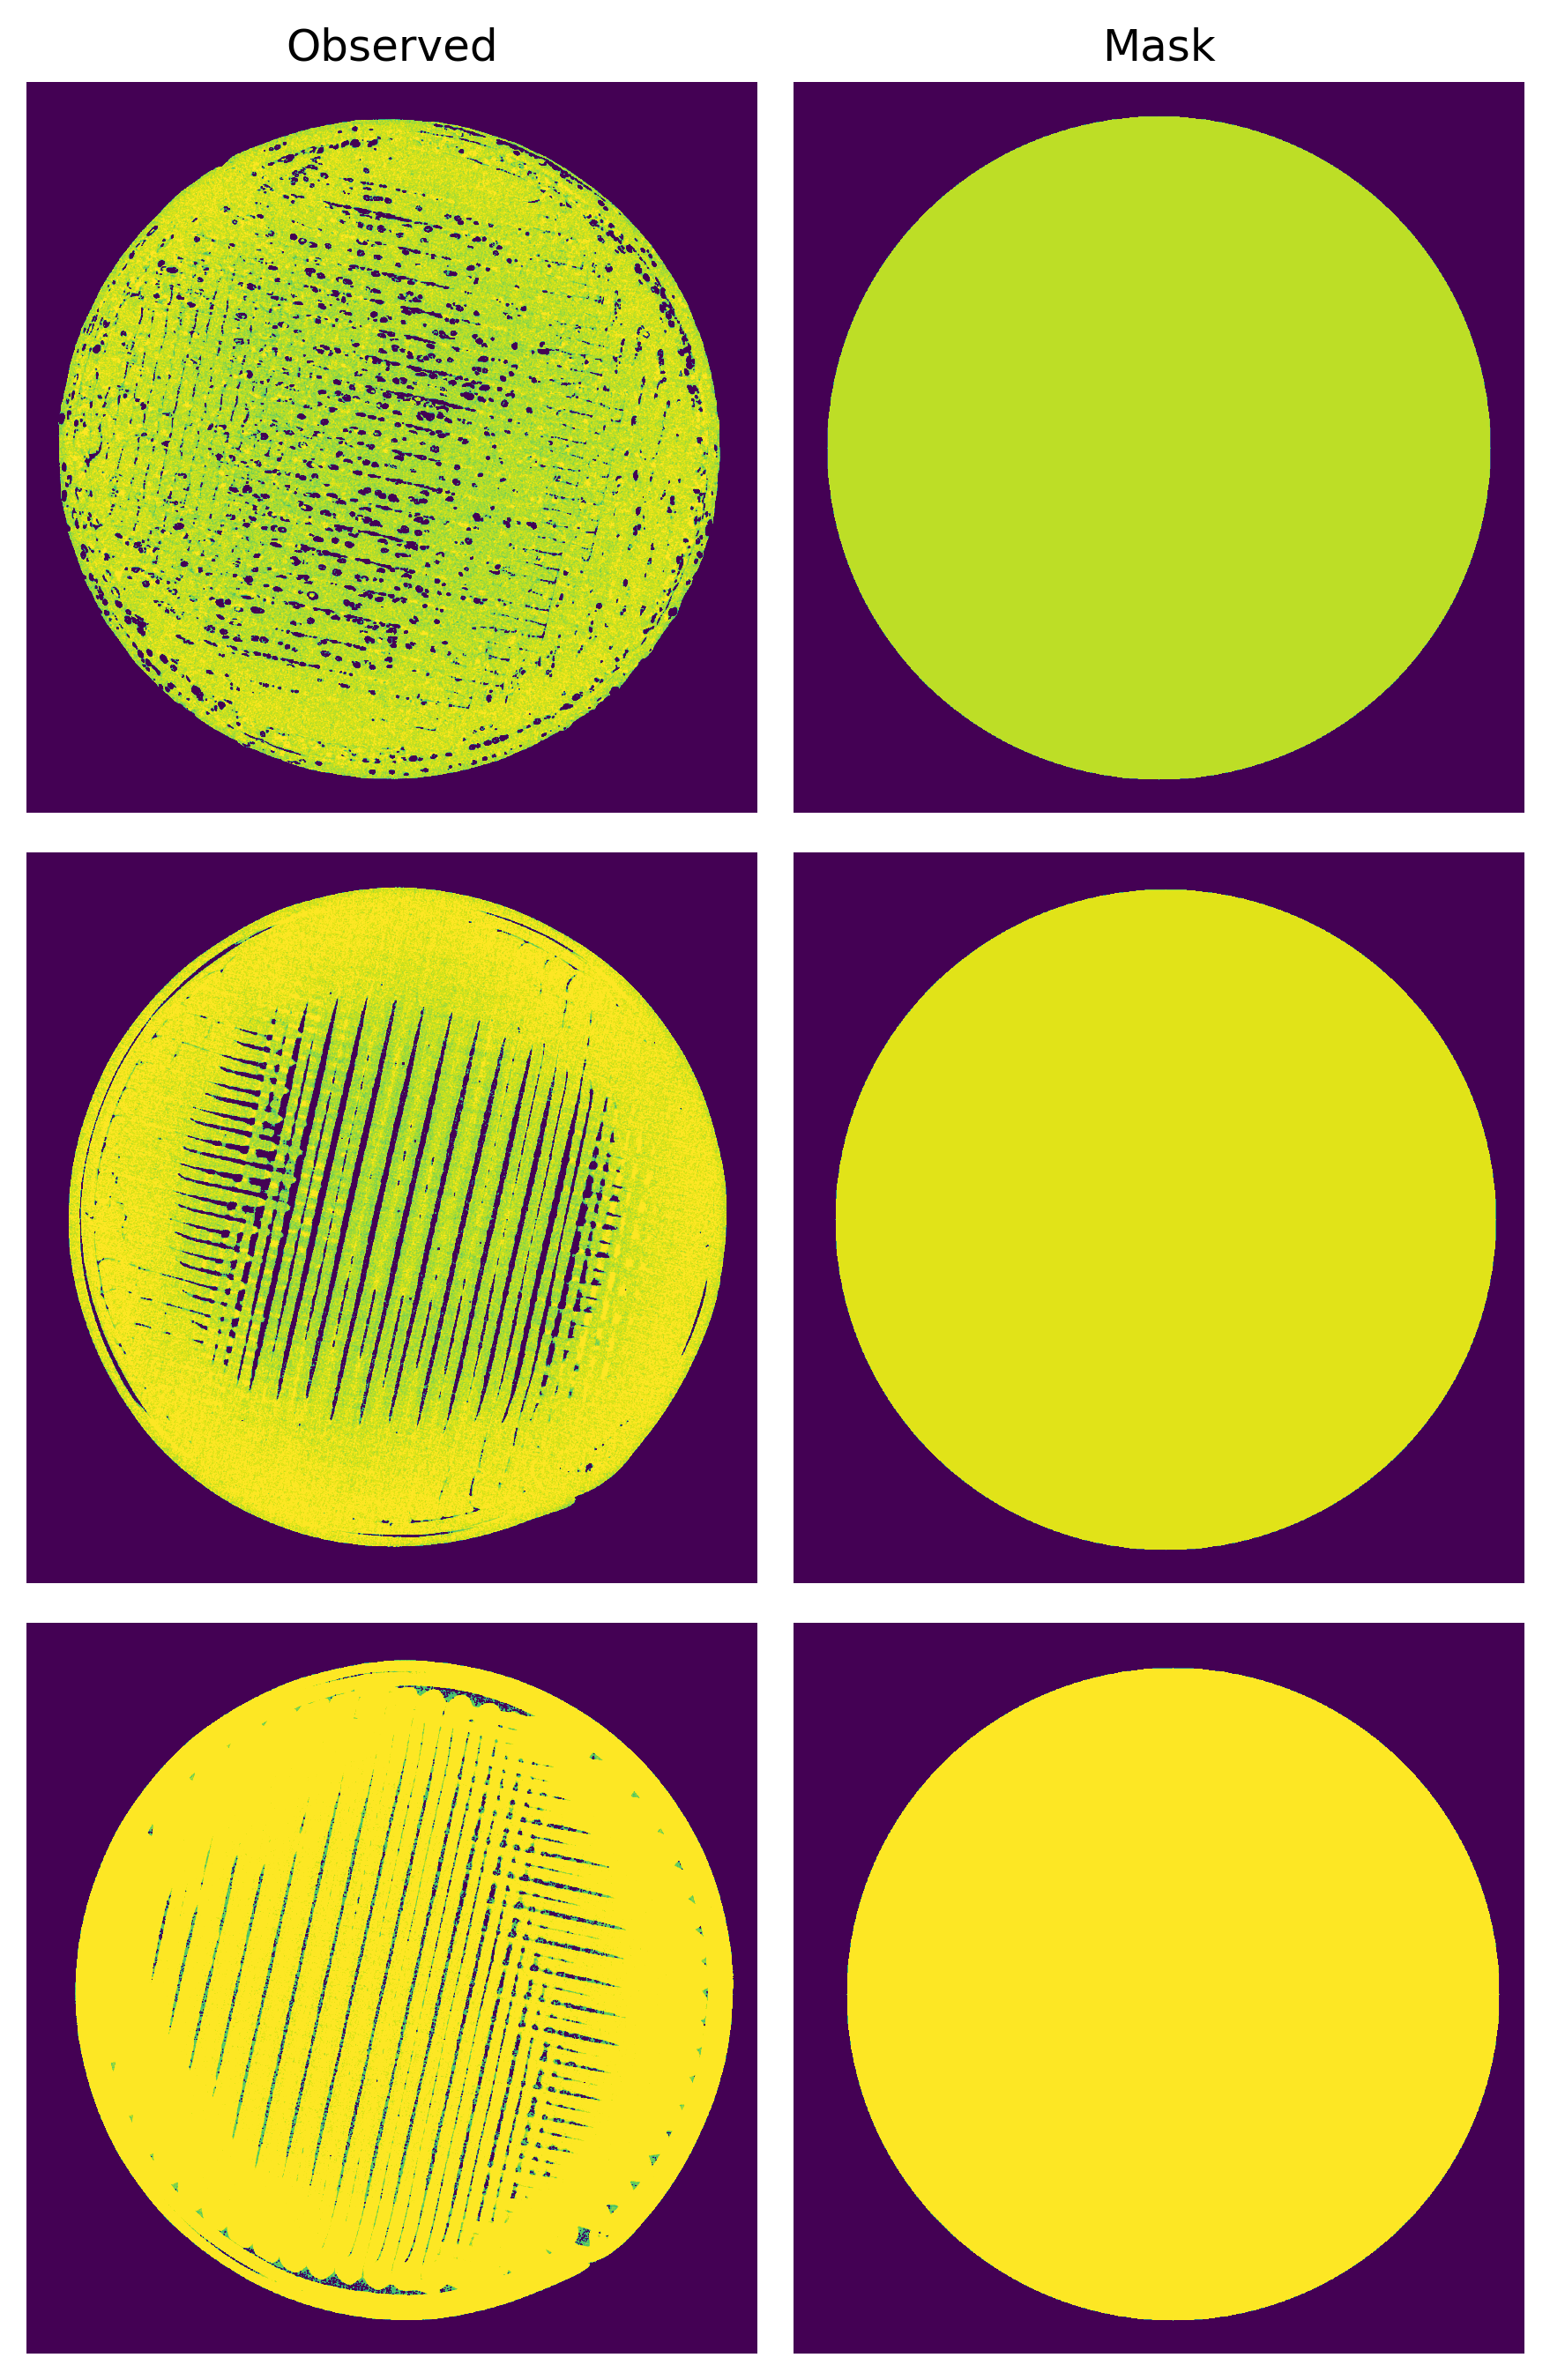

In [34]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(6, 9.1)
fig.set_dpi(300)
axs[0,0].imshow(m1_ob, vmin=9000, vmax=12000)
axs[0,1].imshow(m1_me, vmin=9000, vmax=12000)
axs[1,0].imshow(m2_ob, vmin=9000, vmax=12000)
axs[1,1].imshow(m2_me, vmin=9000, vmax=12000)
axs[2,0].imshow(m3_ob, vmin=9000, vmax=12000)
axs[2,1].imshow(m3_me, vmin=9000, vmax=12000)
axs[0,0].axis(False)
axs[0,1].axis(False)
axs[1,0].axis(False)
axs[1,1].axis(False)
axs[2,0].axis(False)
axs[2,1].axis(False)

axs[0,0].set_title("Observed")
axs[0,1].set_title("Mask")
fig.tight_layout()
plt.show()